# DLP

In [ ]:
import setup
from circuits import * 
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

In [ ]:
import numpy as np

In [ ]:
import math

In [ ]:
N = 1

In [16]:
import numpy as np
import random
l = [1, -5, 4, 2, 7, 4, 8, 0, 9, 3]
print(l) # prints the list


[1, -5, 4, 2, 7, 4, 8, 0, 9, 3]
[7, 1]
[0, -5]


In [58]:
def order(x,N):
    assert(N>x)
    if(math.gcd(x,N)!=1):
        return -1
    for i in range(1,N+1):
        if((x**i % N) == 1):
            return i
    

def d_log(g,y,p=p):
    x=1
    while ((g**x % p)!=y):
        x+=1
        if(x>p):
            raise ValueError()
        
    return x

def pol2cart(rho, phi):
    y = rho * np.cos(phi)
    x = rho * np.sin(phi)
    return(x, y)

def dlp(g, p, s):
    I = [i%(p-1) if i>=p else i%p for i in list(range(s, s + int((p-3)/2)+ 1))]

    dlps = [[i, d_log(g,i,p=p)] for i in range(1,p)]
    #dlps = [[i, order(i,N=p)] for i in range(1,p)]
    
    dlps = [dlp + ["grey"] if (dlp[1] in I)  else dlp + ["grey"] for dlp in dlps]
    #dlps = [dlp + ["None"] if (dlp[1] == -1) else dlp + ["green"] if (dlp[1] in I) else dlp + ["red"] for dlp in dlps]
    [print(dlp) for dlp in dlps if dlp[2]!="None"]

    dlps_order, dlps_log_order, _ = list(zip(*dlps))

    coords_labels = [[pol2cart(1, (dlp[0]-1)*np.pi*2/(p-1)), dlp[2]] for dlp in dlps]

    coords_labels_log = [[pol2cart(1, (dlp[1]-1)*np.pi*2/(p-1)), dlp[2]] for dlp in dlps]

    coords, labels = list(zip(*coords_labels))

    coords_log, _ = list(zip(*coords_labels_log))
    
    s_i = np.array(coords[I[0]-1])
    
    s_f = np.array(coords[I[-1]])
    
    l = labels
    random.seed(1234) # seed the random generator for reproducing the results
    random_indices = random.sample(range(len(l)), 15) # get 2 random indices

    
    labels = list(np.asarray(labels)[random_indices])

    dlp_plot([list(np.asarray(coords)[random_indices]), random_indices], labels, title=r"$\mathbb{{Z}}^{{*}}_{{{p}}}$".format(p=p))
    
    dlp_plot([list(np.asarray(coords_log)[random_indices]), random_indices], labels,  diameter=(s_i, s_f), title=r"$\log_{{{g}}}({{\mathbb{{Z}}^{{*}}_{{{p}}}}})$".format(g=g, p=p))
    
def dlp_plot(coords, labels, diameter=None, title=None):
    circle1 = plt.Circle((0, 0), 1, facecolor= 'none', edgecolor='black', linewidth=3, zorder=0)
    
    coords, idcs = coords
    
    fig, ax = plt.subplots(figsize=(5,5)) 

#     if(diameter):
#         plt.plot(*list(zip(*diameter)), color='black', linewidth=3)
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)

    ax.add_patch(circle1)
    
    xs, ys = list(zip(*coords))

    plt.scatter(xs, ys, color=labels, linewidth=3,zorder =5)
    [plt.annotate(str(j+1), xy=1.2*np.array(coords[i]), ha="center", va="center") for i,j in enumerate(idcs)]
    plt.axis('off')
    
    plt.title(title, fontsize=20, loc='left')
    

    plt.savefig("./images/DLP/" + ''.join(e for e in title if e.isalnum()) + ".png",  bbox_inches='tight', transparent=True, dpi=300)
    
    plt.show()

In [59]:
p = 29
g = 11
s = 11

[1, 28, 'grey']
[2, 9, 'grey']
[3, 17, 'grey']
[4, 18, 'grey']
[5, 2, 'grey']
[6, 26, 'grey']
[7, 24, 'grey']
[8, 27, 'grey']
[9, 6, 'grey']
[10, 11, 'grey']
[11, 1, 'grey']
[12, 7, 'grey']
[13, 22, 'grey']
[14, 5, 'grey']
[15, 19, 'grey']
[16, 8, 'grey']
[17, 21, 'grey']
[18, 15, 'grey']
[19, 25, 'grey']
[20, 20, 'grey']
[21, 13, 'grey']
[22, 10, 'grey']
[23, 12, 'grey']
[24, 16, 'grey']
[25, 4, 'grey']
[26, 3, 'grey']
[27, 23, 'grey']
[28, 14, 'grey']


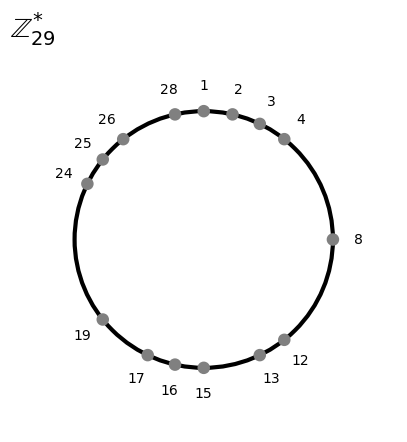

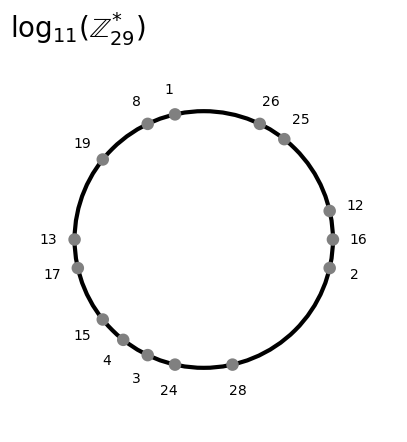

In [60]:
dlp(g,p,s)

[1, 28, 'red']
[2, 9, 'red']
[3, 17, 'green']
[4, 18, 'green']
[5, 2, 'red']
[6, 26, 'red']
[7, 24, 'green']
[8, 27, 'red']
[9, 6, 'red']
[10, 11, 'green']
[11, 1, 'red']
[12, 7, 'red']
[13, 22, 'green']
[14, 5, 'red']
[15, 19, 'green']
[16, 8, 'red']
[17, 21, 'green']
[18, 15, 'green']
[19, 25, 'red']
[20, 20, 'green']
[21, 13, 'green']
[22, 10, 'red']
[23, 12, 'green']
[24, 16, 'green']
[25, 4, 'red']
[26, 3, 'red']
[27, 23, 'green']
[28, 14, 'green']
['red', 'green', 'green', 'red', 'green', 'red', 'red', 'green', 'red', 'red', 'red', 'green', 'green', 'green', 'red']


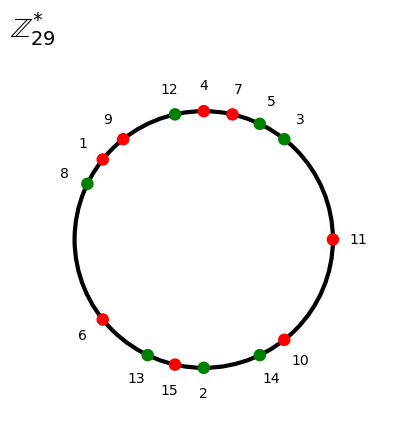

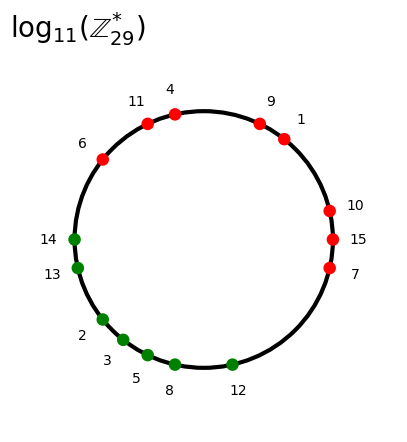

In [36]:
dlp(g,p,s)

# Order Finding

In [14]:
def coprimes(n):
    cps = []
    for i in range(n):
        if(np.gcd(i,n)==1):
            cps.append(i)
    return cps

def pol2cart(rho, phi):
    y = rho * np.cos(phi)
    x = rho * np.sin(phi)
    return(x, y)

def order_dlp(g, p, s):
    I = [i%(p-1) if i>=p else i%p for i in list(range(1, s))]#s + int((p-3)/2)+ 1))]
    print(I)

    #dlps = [[i, d_log(g,i,p=p)] for i in range(1,p)]
    dlps = [[i, order(i,N=p)] for i in coprimes(p)]
    
    #dlps = [dlp + ["green"] if (dlp[1] in I)  else dlp + ["red"] for dlp in dlps]
    dlps = [dlp + ["None"] if (dlp[1] == -1) else dlp + ["green"] if (dlp[1] in I) else dlp + ["red"] for dlp in dlps]
    #[print(dlp) for dlp in dlps if dlp[2]!="None"]

    print(dlps)
    dlps_order, dlps_log_order, _ = list(zip(*dlps))

    coords_labels = [[pol2cart(1, (dlp[0]-1)*np.pi*2/(p-1)), dlp[2], dlp[0]] for dlp in dlps]

    coords_labels_log = [[pol2cart(1, (dlp[1]-1)*np.pi*2/(p-1)), dlp[2], dlp[1]] for dlp in dlps]

    coords, labels, labels_2 = list(zip(*coords_labels))

    coords_log, _, labels_2_log = list(zip(*coords_labels_log))

    _, idx = np.unique(np.array(coords_log).round(decimals=4), axis=0, return_index = True)
    coords_log
    
    coords_log = np.array(coords_log)[np.sort(idx)]
    
    labels_log = np.array(labels)[np.sort(idx)]
    labels_2_log = np.array(labels_2_log)[np.sort(idx)]
    
    s_i = np.array(coords[0])#I[0]-1])
    
    s_f = np.array(coords[-1])#I[-1]])
    
    order_dlp_plot(coords, labels, np.array(labels_2), diameter=None, title=r"$\mathbb{{Z}}^{{*}}_{{{p}}}$".format(p=p))

    order_dlp_plot(coords_log, labels_log, labels_2_log, diameter=(s_i, s_f), title=r"$Ord({{\mathbb{{Z}}^{{*}}_{{{p}}}}})$".format( p=p))
    return coords_log
    
def order_dlp_plot(coords, labels, labels_2, diameter=None, title=None):
    circle1 = plt.Circle((0, 0), 1, facecolor= 'none', edgecolor='black', linewidth=3, zorder=0)

    
    fig, ax = plt.subplots(figsize=(5,5)) 

    if(diameter):
        plt.plot(*list(zip(*diameter)), color='black', linewidth=3)
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)

    ax.add_patch(circle1)

    xs, ys = list(zip(*coords))

    plt.scatter(xs, ys, color=labels, linewidth=3,zorder =5)
    [plt.annotate(str(j), xy=1.2*np.array(coords[i-1]), ha="center", va="center") for i,j in zip(range(1,len(xs)+1), labels_2)]
    plt.axis('off')
    
    plt.title(title, fontsize=20, loc='left')
    
    plt.savefig("./images/DLP/" + ''.join(e for e in title if e.isalnum()) + ".png",  bbox_inches='tight', transparent=True, dpi=300)
    
    plt.show()

In [15]:
p = N = 61

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[[1, 1, 'green'], [2, 60, 'red'], [3, 10, 'green'], [4, 30, 'red'], [5, 30, 'red'], [6, 60, 'red'], [7, 60, 'red'], [8, 20, 'red'], [9, 5, 'green'], [10, 60, 'red'], [11, 4, 'green'], [12, 15, 'green'], [13, 3, 'green'], [14, 6, 'green'], [15, 15, 'green'], [16, 15, 'green'], [17, 60, 'red'], [18, 60, 'red'], [19, 30, 'red'], [20, 5, 'green'], [21, 12, 'green'], [22, 15, 'green'], [23, 20, 'red'], [24, 20, 'red'], [25, 15, 'green'], [26, 60, 'red'], [27, 10, 'green'], [28, 20, 'red'], [29, 12, 'green'], [30, 60, 'red'], [31, 60, 'red'], [32, 12, 'green'], [33, 20, 'red'], [34, 5, 'green'], [35, 60, 'red'], [36, 30, 'red'], [37, 20, 'red'], [38, 20, 'red'], [39, 30, 'red'], [40, 12, 'green'], [41, 10, 'green'], [42, 15, 'green'], [43, 60, 'red'], [44, 60, 'red'], [45, 30, 'red'], [46, 30, 'red'], [47, 3, 'green'], [48, 6, 'green'], [49, 30, 'red'], [50, 4, 'green'], [51, 60, 'red'], [52, 10, 'green'], [53, 20, 'red'], [

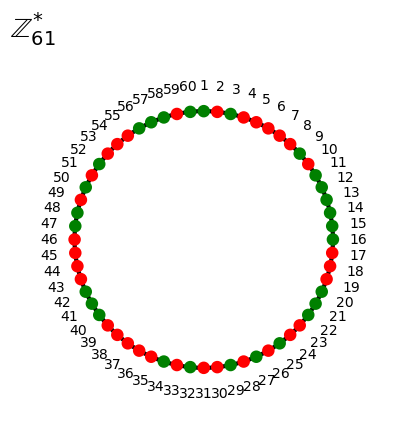

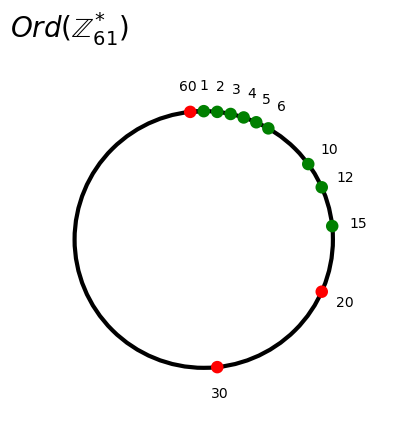

In [16]:
coords = order_dlp(1,N,20)

In [12]:
sp.totient(12)

28

In [ ]:
for i in coprimes(60)

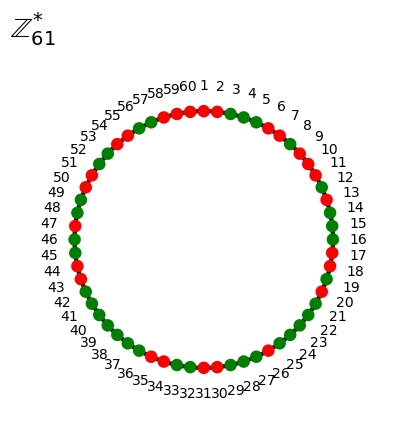

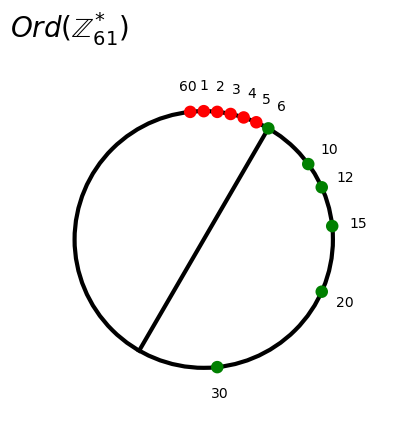

In [201]:
coords = order_dlp(1,N,6)

In [170]:
coords_cond, idx = np.unique(np.array(coords).round(decimals=4), axis=0, return_index = True)

In [171]:
np.sort(idx)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [111]:
np.array(coords)[np.sort(idx)]

array([[ 0.        ,  1.        ],
       [-0.34202014,  0.93969262],
       [ 0.34202014, -0.93969262],
       [ 0.64278761,  0.76604444],
       [ 0.98480775, -0.17364818],
       [ 0.34202014,  0.93969262]])

In [106]:
coords_cond

array([[-0.342 ,  0.9397],
       [ 0.    ,  1.    ],
       [ 0.342 , -0.9397],
       [ 0.342 ,  0.9397],
       [ 0.6428,  0.766 ],
       [ 0.9848, -0.1736]])